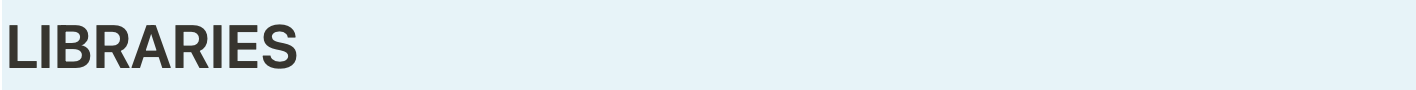

In [ ]:
import os 
import re 
from scipy import ndimage, misc 
from tqdm import tqdm
from tensorflow.keras.preprocessing.image import img_to_array


from skimage.transform import resize, rescale
import matplotlib.pyplot as plt
import numpy as np
np. random. seed(0)
import cv2 as cv2

import tensorflow as tf
from tensorflow.keras.layers import Input, Dense ,Conv2D,MaxPooling2D ,Dropout, Activation
from tensorflow.keras.layers import Conv2DTranspose, UpSampling2D, add
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers
from tensorflow import keras
from tensorflow.keras.utils import plot_model
import tensorflow as tf

print(tf.__version__)

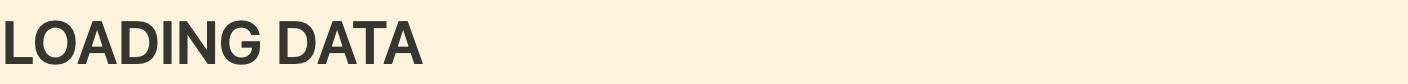

In [ ]:
# to get the files in proper order
def sorted_alphanumeric(data):  
    convert = lambda text: int(text) if text.isdigit() else text.lower()
    alphanum_key = lambda key: [convert(c) for c in re.split('([0-9]+)',key)]
    return sorted(data,key = alphanum_key)

# defining the size of the image
SIZE = 64

# loading in training high-res img
train_high_img = []
# path to be filled in
path = ''
files = os.listdir(path)
files = sorted_alphanumeric(files)
for i in tqdm(files):    
    if i == '1001.jpg':
        break
    else:    
        img = cv2.imread(path + '/'+i,1)
        # open cv reads images in BGR format so we have to convert it to RGB
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        #resizing image
        img = cv2.resize(img, (SIZE, SIZE))
        img = img.astype('float32') / 1023.0
        train_high_img.append(img_to_array(img))
print("training high-res img")

# loading in training low-res img
train_low_img = []
# path to be filled in
path = ''
files = os.listdir(path)
files = sorted_alphanumeric(files)
for i in tqdm(files):
    if i == '1001.jpg':
        break
    else: 
        img = cv2.imread(path + '/'+i,1)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        #resizing image
        img = cv2.resize(img, (SIZE, SIZE))
        img = img.astype('float32') / 1023.0
        train_low_img.append(img_to_array(img))
print("training low-res img")

# loading in testing high-res img
test_high_img = []
# path to be filled in
path = ''
files = os.listdir(path)
files = sorted_alphanumeric(files)
for i in tqdm(files):    
    if i == '251.jpg':
        break
    else:    
        img = cv2.imread(path + '/'+i,1)
        # open cv reads images in BGR format so we have to convert it to RGB
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        #resizing image
        img = cv2.resize(img, (SIZE, SIZE))
        img = img.astype('float32') / 1023.0
        test_high_img.append(img_to_array(img))
print("testing high-res img")


# loading in testing low-res img
test_low_img = []
# path to be filled in
path = ''
files = os.listdir(path)
files = sorted_alphanumeric(files)
for i in tqdm(files):
    if i == '251.jpg':
        break
    else: 
        img = cv2.imread(path + '/'+i,1)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        #resizing image
        img = cv2.resize(img, (SIZE, SIZE))
        img = img.astype('float32') / 1023.0
        test_low_img.append(img_to_array(img))
print("testing high-res img")

# loading in high-res version of image to be inputted into model
validate_high_img = []
# path to be filled in
path = ''
files = os.listdir(path)
files = sorted_alphanumeric(files)
for i in tqdm(files):
    if i == '11.jpg':
        break
    else: 
        img = cv2.imread(path + '/'+i,1)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        #resizing image
        img = cv2.resize(img, (SIZE, SIZE))
        img = img.astype('float32') / 256
        validate_high_img.append(img_to_array(img))
print("validate_high-res img")

# loading in high-res version of image to be inputted into model
validate_low_img = []
# path to be filled in
path = ''
files = os.listdir(path)
files = sorted_alphanumeric(files)
for i in tqdm(files):
    if i == '11.jpg':
        break
    else: 
        img = cv2.imread(path + '/'+i,1)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        #resizing image
        img = cv2.resize(img, (SIZE, SIZE))
        img = img.astype('float32') / 256
        validate_low_img.append(img_to_array(img))
print("validate_low-res img")

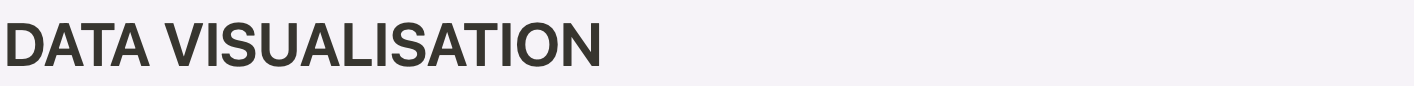

In [ ]:
#for sanity check, displays images that were loaded in
for i in range(4):
    a = np.random.randint(0,855)
    plt.figure(figsize=(10,10))
    plt.subplot(1,2,1)
    plt.title('High Resolution Imge', color = 'green', fontsize = 20)
    plt.imshow(test_high_img[a])
    plt.axis('off')
    plt.subplot(1,2,2)
    plt.title('low Resolution Image ', color = 'black', fontsize = 20)
    plt.imshow(test_low_img[a])
    plt.axis('off')

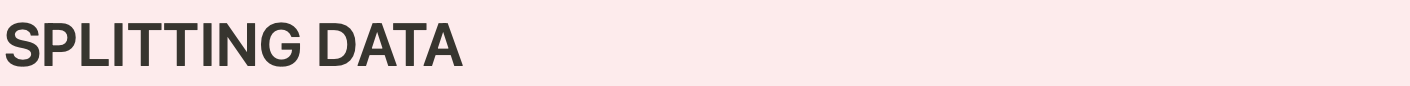

In [ ]:
# reshaping of data
train_high_img = np.reshape(train_high_img,(len(train_high_img),SIZE,SIZE,3))
train_low_img = np.reshape(train_low_img,(len(train_low_img),SIZE,SIZE,3))

test_high_img= np.reshape(test_high_img,(len(test_high_img),SIZE,SIZE,3))
test_low_img = np.reshape(test_low_img,(len(test_low_img),SIZE,SIZE,3))

validate_high_img = np.reshape(validate_high_img,(len(validate_high_img),SIZE,SIZE,3))
validate_low_img = np.reshape(validate_low_img,(len(validate_low_img),SIZE,SIZE,3))

print("Shape of training images:",train_high_img.shape)
print("Shape of test images:",test_high_img.shape)
print("Shape of validation images:",validate_high_img.shape)

# ARCITECTURE OF MODEL 


In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate, Conv2DTranspose, BatchNormalization, Dropout, Lambda
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Activation, MaxPool2D, Concatenate


def conv_block(input, num_filters):
    x = Conv2D(num_filters, 3, padding="same")(input)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)

    x = Conv2D(num_filters, 3, padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)

    return x

#Encoder block: Conv block followed by maxpooling
def encoder_block(input, num_filters):
    x = conv_block(input, num_filters)
    p = MaxPool2D((2, 2))(x)
    return x, p

#Decoder block
#skip features gets input from encoder for concatenation

def decoder_block(input, skip_features, num_filters):
    x = Conv2DTranspose(num_filters, (2, 2), strides=2, padding="same")(input)
    x = Concatenate()([x, skip_features])
    x = conv_block(x, num_filters)
    return x

#Build Unet using the blocks
def build_unet(input_shape):

    s1, p1 = encoder_block(input_shape, 64)
    s2, p2 = encoder_block(p1, 128)
    s3, p3 = encoder_block(p2, 256)
    s4, p4 = encoder_block(p3, 512)

    b1 = conv_block(p4, 1024)             #Bridge

    d1 = decoder_block(b1, s4, 512)
    d2 = decoder_block(d1, s3, 256)
    d3 = decoder_block(d2, s2, 128)
    d4 = decoder_block(d3, s1, 64)

    outputs = Conv2D(3, 1, padding="same", activation="LeakyReLU")(d4)  #Binary (can be multiclass)

    model = Model(inputs, outputs, name="U-Net")

    # model.summary()
    return model
inputs = Input(shape=(256,256,3))
model = build_unet(inputs)
# plot_model(model, to_file ='super_res(U-NET).png',show_shapes=True)

# Loss function (Mean Squared Error)

In [5]:
def pixel_mse_loss(x,y):
    return tf.reduce_mean( (x - y) ** 2 )

model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001), loss = pixel_mse_loss,
              metrics = ['acc'])
model.summary()
plot_model(model, to_file ='super_res(U-NET).png',show_shapes=True)

In [ ]:
# to train the model
model.fit(train_low_img, train_high_img, epochs = 1, batch_size=1,
          validation_data = (test_low_img,test_high_img))

In [9]:
# to save the model once it has finished training
model.save('unet_modified.h5')

In [4]:
# to load a model in if needed
#unet_model = keras.models.load_model("gen_e_5.h5", compile=False)


In [7]:
def PSNR(y_true,y_pred):
    mse=tf.reduce_mean( (y_true - y_pred) ** 2 )
    return 20 * log10(1/ (mse ** 0.5))

def log10(x):
    numerator = tf.math.log(x)
    denominator = tf.math.log(tf.constant(10, dtype=numerator.dtype))
    return numerator / denominator

def pixel_MSE(y_true,y_pred):
    return tf.reduce_mean( (y_true - y_pred) ** 2 )

In [ ]:
# to plot the results in comparison with the original and low-resolution image
def plot_images(high,low,predicted):
    plt.figure(figsize=(15,15))
    plt.subplot(1,3,1)
    plt.title('High Image', color = 'green', fontsize = 20)
    plt.imshow(high)
    plt.subplot(1,3,2)
    plt.title('Low Image ', color = 'black', fontsize = 20)
    plt.imshow(low)
    plt.subplot(1,3,3)
    plt.title('Predicted Image ', color = 'Red', fontsize = 20)
    plt.imshow(predicted)

    plt.show()

for i in range(3):
  predicted = np.clip(model.predict(validate_low_img[i].reshape(1,SIZE, SIZE,3)),0.0,1.0).reshape(SIZE, SIZE,3)
  plot_images(validate_high_img[i], validate_low_img[i],predicted)
  print('PSNR',PSNR(validate_high_img[i],predicted),'dB',"SSIM",tf.image.ssim(validate_high_img[i],predicted,max_val=1))